In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
from kmeansclustering import KMeans #Import my own implementation of KMeans clustering algorithm in Python
#sns.set()

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.

One of the most widely application of K-Means clustering algorithm is image compression.
Problem Description:
* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, so our task is to reduce the number of colors to only 16 colors i.e to find a group(cluster) of 16 colors that can make up our image while losing some beauty though.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities). In this part, We will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, we need to treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once the cluster centroids on the image has been computed, we can will then use the 16 colors to replace the pixels in the original image.

In [2]:
model = KMeans(K=3)

Let us first test my algorithm on random data

In [3]:
np.random.seed(42)
X = np.random.random(size=(300, 2)) * 10
X[:5]

array([[3.74540119, 9.50714306],
       [7.31993942, 5.98658484],
       [1.5601864 , 1.5599452 ],
       [0.58083612, 8.66176146],
       [6.01115012, 7.08072578]])

In [4]:
max_iters = 10
model.fit(X, max_iters)

In [5]:
centroids = model.get_centroids()
centroids

array([[5.20163501, 8.521815  ],
       [2.94448892, 3.85097729],
       [2.37637544, 7.28216349]])

In [6]:
idx = model.get_idx()
print(idx[:3])
idx

[0 0 1]


array([0, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0,
       0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1,
       2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1])

In [37]:
history = model.get_centroids_history()
history[:2]

array([[[8.09361155, 8.10113395],
        [9.42909704, 3.23202932],
        [0.43159912, 8.91143114]],

       [[1.81824967, 1.8340451 ],
        [9.40230241, 5.75474178],
        [3.20780065, 1.8651851 ]]])

In [8]:
clusters = model.get_clusters()
print(len(clusters))
print(clusters[0].shape)
print(clusters[1].shape)
print(clusters[2].shape)

3
(104, 2)
(141, 2)
(55, 2)


In [36]:
predictions = model.predict()
predictions[:5]

array([[5.20163501, 8.521815  ],
       [5.20163501, 8.521815  ],
       [2.94448892, 3.85097729],
       [2.37637544, 7.28216349],
       [5.20163501, 8.521815  ]])

Let us now move to image compression application of the algorithm. We will my image taken somewhere in Nigeria

In [35]:
original_img = plt.imread('data/ndubuisi.jpg') #Use matplolib pyplot to read the image
original_img[:2]

array([[[204, 187, 179],
        [205, 192, 183],
        [202, 193, 184],
        ...,
        [214, 216, 213],
        [212, 212, 210],
        [213, 212, 210]],

       [[143, 129, 120],
        [161, 148, 139],
        [151, 141, 131],
        ...,
        [217, 215, 216],
        [208, 206, 207],
        [220, 215, 219]]], dtype=uint8)

There is 854 * 480 = 409, 920 intesity values in our image. We need to reduce it. Furthermore, since the image is encoded in RGB encoding, we can have a combination of 409, 920 * 3 = 1, 229, 760 different color combinations.

In [11]:
original_img.shape 

(854, 480, 3)

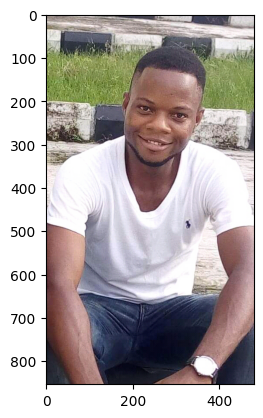

In [12]:
plt.imshow(original_img);

In [13]:
n_0 = original_img[0]
n_0

array([[204, 187, 179],
       [205, 192, 183],
       [202, 193, 184],
       ...,
       [214, 216, 213],
       [212, 212, 210],
       [213, 212, 210]], dtype=uint8)

In [14]:
row_n_0_0 = n_0[0]
row_n_0_0

array([204, 187, 179], dtype=uint8)

In [15]:
row_n_0_0[1] #Green intesity value

187

In one code we can accomplish this below

In [16]:
#RGB encoding: Red, Green and Blue intensity values
R = 0
G = 1
B = 2
original_img[0, 0, G] #Gives Green intensity value at row 0 and column 0

187

Since the image is in jpeg format, we need to divide it by 255 to make its values lie between 0 and 1

In [17]:
original_img = original_img / 255

In [34]:
original_img[:2]

array([[[0.8       , 0.73333333, 0.70196078],
        [0.80392157, 0.75294118, 0.71764706],
        [0.79215686, 0.75686275, 0.72156863],
        ...,
        [0.83921569, 0.84705882, 0.83529412],
        [0.83137255, 0.83137255, 0.82352941],
        [0.83529412, 0.83137255, 0.82352941]],

       [[0.56078431, 0.50588235, 0.47058824],
        [0.63137255, 0.58039216, 0.54509804],
        [0.59215686, 0.55294118, 0.51372549],
        ...,
        [0.85098039, 0.84313725, 0.84705882],
        [0.81568627, 0.80784314, 0.81176471],
        [0.8627451 , 0.84313725, 0.85882353]]])

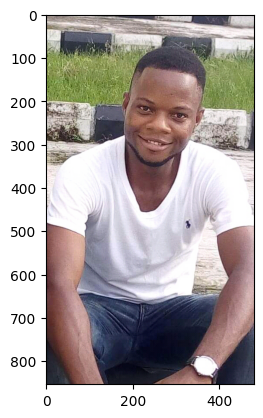

In [19]:
plt.imshow(original_img);#The same as before

In [20]:
#RGB encoding: Red, Green and Blue intensity values
R = 0
G = 1
B = 2
original_img[0, 0, G] #Gives Green intensity value at row 0 and column 0 (now the value lies between 0 and 1 instead of 187)

0.7333333333333333

In [21]:
# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 854 x 480 = 409920)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [22]:
X_img.shape

(409920, 3)

In [23]:
X_img

array([[0.8       , 0.73333333, 0.70196078],
       [0.80392157, 0.75294118, 0.71764706],
       [0.79215686, 0.75686275, 0.72156863],
       ...,
       [0.27058824, 0.30196078, 0.38431373],
       [0.23137255, 0.2627451 , 0.35294118],
       [0.2745098 , 0.30588235, 0.38039216]])

Let us apply our KMeans algorithm on the image

In [24]:
k_means_model = KMeans(K=16)

In [25]:
max_iters = 10
k_means_model.fit(X_img, max_iters)

In [26]:
centroids = k_means_model.get_centroids()
print(centroids.shape)
centroids[:10]

(16, 3)


array([[0.84705882, 0.84705882, 0.89411765],
       [0.65882353, 0.61568627, 0.63137255],
       [0.57647059, 0.61568627, 0.41176471],
       [0.83137255, 0.83529412, 0.81568627],
       [0.30980392, 0.29411765, 0.35294118],
       [1.        , 1.        , 1.        ],
       [0.60784314, 0.58823529, 0.56470588],
       [0.91764706, 0.8627451 , 0.85882353],
       [0.92941176, 0.91764706, 0.96078431],
       [0.49803922, 0.54901961, 0.36862745]])

In [27]:
idx = k_means_model.get_idx()
print(idx.shape)
idx

(409920,)


array([14, 14, 14, ...,  4,  4,  4])

We can view the 16 colors that our algorithm has generated, our compressed image will now use these 16 colors.

In [45]:
import matplotlib.patches as patches

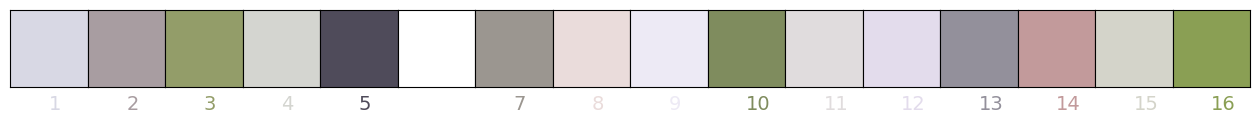

In [52]:
fig, ax = plt.subplots(1,16,figsize=(16, 1))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(len(ax)):
    style = dict(size=14, color=centroids[i])
    ax[i].xaxis.set_major_locator(plt.NullLocator())
    ax[i].yaxis.set_major_locator(plt.NullLocator())
    rectangle = patches.Rectangle((0.0, 0.0), 1, 1, linewidth=1, edgecolor=centroids[i], facecolor=centroids[i])
    ax[i].add_patch(rectangle)
    ax[i].text(0.5, -0.3, f"{i+1}", transform=ax[i].transAxes, **style)

In [38]:
clusters = k_means_model.get_clusters()
clusters[:2]

[array([[0.82745098, 0.84705882, 0.85882353],
        [0.8627451 , 0.85490196, 0.89803922],
        [0.82745098, 0.83921569, 0.86666667],
        ...,
        [0.85882353, 0.78431373, 0.8627451 ],
        [0.85098039, 0.80392157, 0.85882353],
        [0.85490196, 0.80392157, 0.88235294]]),
 array([[0.7254902 , 0.68235294, 0.66666667],
        [0.72156863, 0.67843137, 0.65490196],
        [0.7254902 , 0.68627451, 0.69019608],
        ...,
        [0.71372549, 0.60784314, 0.6745098 ],
        [0.70980392, 0.66666667, 0.72156863],
        [0.67058824, 0.61568627, 0.66666667]])]

In [30]:
# Replace each pixel with the color of the closest centroid
predictions = k_means_model.predict() 
print(predictions.shape)

# Reshape image into proper dimensions
X_recovered = np.reshape(predictions, original_img.shape) 
print(X_recovered.shape)

(409920, 3)
(854, 480, 3)


Now let us display our compressed image and compare with the original image

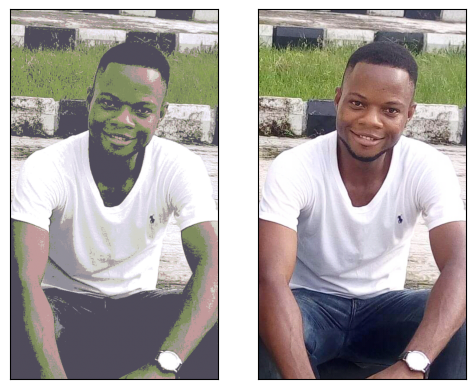

In [58]:
fig, ax = plt.subplots(1,2, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
ax[0].imshow(X_recovered)
ax[1].imshow(original_img)
ax[0].xaxis.set_major_locator(plt.NullLocator())
ax[0].yaxis.set_major_locator(plt.NullLocator())
ax[1].xaxis.set_major_locator(plt.NullLocator())
ax[1].yaxis.set_major_locator(plt.NullLocator());

The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the pixel locations, resulting in a total size of 854 * 480 * 24 = 9,838,080 bits. The new representation requires some overhead storage in the form of a dictionary of 16 colors, each of which requires 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits is therefore 16 * 24 + 854 * 480 * 4 = 1,640,064 bits, which corresponds to compressing the original image by about a factor of 6.

In [33]:
9_838_080 / (384 + (409920*4)) #compression by a factor of 6

5.998595176773589